In [1]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

# Clear any logs from previous runs
%rm -rf ./my_logs/

import tensorflow as tf

tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Data Import and Pre-processing

In [2]:
import pandas as pd
import numpy as np

In [3]:
creepy = pd.read_pickle('./pickles/creepy.pickle')
noncreepy = pd.read_pickle('./pickles/noncreepy.pickle')

In [4]:
creepy

,index,id,title,selftext,score,sum_vec,log_(score+min+0.01),sum_vec_with_log_prepended,selftext_sents_count,vec
0,0,gxsa0i,Do NOT Open Your Eyes... (Pt. 1),This is the only rule of our household. If you...,1,"[2.940986, -5.617336, 11.896912, -15.436118, -...",0.698135,"[0.6981347, 2.940986, -5.617336, 11.896912, -1...",38,"[0.6981347, 0.077394366, -0.14782463, 0.313076..."
1,1,gxs6jf,Do NOT open your eyes. (The Beginning),This is the only rule of our household. If you...,1,"[2.940986, -5.617336, 11.896912, -15.436118, -...",0.698135,"[0.6981347, 2.940986, -5.617336, 11.896912, -1...",38,"[0.6981347, 0.077394366, -0.14782463, 0.313076..."
2,2,gxrytp,My Best Friend Saw Bugs Under His Skin,It is hard for me to talk about my old friend ...,1,"[-19.201273, -13.715499, 24.393753, -33.97739,...",0.698135,"[0.6981347, -19.201273, -13.715499, 24.393753,...",81,"[0.6981347, -0.23705275, -0.16932714, 0.301157..."
3,3,gxrnj7,"I picked up a hitchhiker by mistake, now he's ...",They say the devil is in the details. Well th...,1,"[-60.77887, -33.726135, 119.47121, -95.021385,...",0.698135,"[0.6981347, -60.77887, -33.726135, 119.47121, ...",429,"[0.6981347, -0.14167568, -0.0786157, 0.2784876..."
4,4,gxrm8v,I'm tasked with killing nameless things out in...,“Any sign of ‘em yet?” \n\nI continued staring...,1,"[-22.785084, 14.806147, 26.129469, -24.832222,...",0.698135,"[0.6981347, -22.785084, 14.806147, 26.129469, ...",177,"[0.6981347, -0.12872928, 0.083650544, 0.147624..."
...,...,...,...,...,...,...,...,...,...,...
15367,15367,eihp0m,Hylophobia,*There is no cure for trauma. Once it enters t...,1,"[-51.169456, -5.836507, 70.7862, -111.05138, 7...",0.698135,"[0.6981347, -51.169456, -5.836507, 70.7862, -1...",447,"[0.6981347, -0.11447306, -0.013057062, 0.15835..."
15368,15368,eihmg7,I adopted my late sisters orphaned child. This...,"I knew Persephone would need time to adjust, b...",1,"[-22.327501, -34.563572, 39.197514, -72.437645...",0.698135,"[0.6981347, -22.327501, -34.563572, 39.197514,...",246,"[0.6981347, -0.0907622, -0.14050232, 0.1593394..."
15369,15369,eihgtp,My first paranormal experience!!,"This isnt much, but this is surely the first u...",1,"[-4.7810946, 0.12821773, 2.941056, -3.949329, ...",0.698135,"[0.6981347, -4.7810946, 0.12821773, 2.941056, ...",12,"[0.6981347, -0.39842454, 0.010684811, 0.245088..."
15370,15370,eigzgj,I met the demon under my bed... Its not what I...,"Okay. for context, this story started about a ...",1,"[-1.7662485, -4.471965, 8.116567, -12.409156, ...",0.698135,"[0.6981347, -1.7662485, -4.471965, 8.116567, -...",30,"[0.6981347, -0.05887495, -0.1490655, 0.2705522..."


In [5]:
creepy_sum_vec_with_log_prepended = creepy.loc[:,'vec'].copy()
noncreepy_sum_vec_with_log_prepended = noncreepy.loc[:,'vec'].copy()

In [6]:
creepy_features = pd.DataFrame(creepy_sum_vec_with_log_prepended.to_list()).to_numpy(dtype = float)
creepy_labels = np.ones(len(creepy_features))

In [7]:
noncreepy_features = pd.DataFrame(noncreepy_sum_vec_with_log_prepended.to_list()).to_numpy(dtype = float)
noncreepy_labels = np.zeros(len(noncreepy_features))

In [8]:
features = np.concatenate((creepy_features, noncreepy_features))
labels = np.concatenate((creepy_labels, noncreepy_labels))
print(features, labels)

[[ 0.69813472  0.07739437 -0.14782463 ... -0.12086978  0.00944329
  -0.23866224]
 [ 0.69813472  0.07739437 -0.14782463 ... -0.12086978  0.00944329
  -0.23866224]
 [ 0.69813472 -0.23705275 -0.16932714 ...  0.22444913 -0.20354605
  -0.08335517]
 ...
 [ 0.69813472 -0.06071103  0.02235722 ...  0.10523307 -0.29174414
  -0.14749481]
 [ 0.69813472  0.14904401 -0.10234425 ... -0.13638787  0.24349198
   0.0390255 ]
 [ 0.69813472 -0.24383056 -0.36296186 ...  0.32824722 -0.14198837
  -0.42668518]] [1. 1. 1. ... 0. 0. 0.]


In [9]:
print(features.shape, labels.shape)

(37846, 769) (37846,)


In [10]:
from sklearn.utils import shuffle

features, labels = shuffle(features, labels)
print(features, labels)

[[ 0.69813472 -0.10446788 -0.09281977 ...  0.14675722 -0.09563572
   0.089424  ]
 [ 0.69813472 -0.18613075 -0.11686448 ...  0.05456263  0.03891327
  -0.07217776]
 [ 0.69813472 -0.14757869  0.02058836 ...  0.08251394  0.04262304
  -0.09654816]
 ...
 [ 0.69813472  0.22493467 -0.13509835 ...  0.05290009  0.05544561
  -0.10662918]
 [ 0.69813472 -0.13625054 -0.13367461 ...  0.29136366 -0.15287653
  -0.17043135]
 [ 0.69813472 -0.01252431  0.04024172 ... -0.01603297  0.28852242
   0.5527544 ]] [1. 1. 1. ... 1. 0. 0.]


In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(features)
print(scaled_features, labels)

[[0.         0.4735473  0.42996661 ... 0.55004096 0.49742298 0.46874746]
 [0.         0.4502102  0.42193795 ... 0.52138312 0.54623804 0.42375447]
 [0.         0.46122736 0.46783424 ... 0.53007152 0.54758396 0.41696929]
 ...
 [0.         0.5676819  0.41584955 ... 0.52086633 0.55223605 0.41416255]
 [0.         0.46446465 0.41632495 ... 0.59499054 0.47665573 0.39639881]
 [0.         0.49982236 0.47439661 ... 0.49943912 0.6367975  0.59774742]] [1. 1. 1. ... 1. 0. 0.]


- [x] 70% train, 15% val, 15% test
 - Train: 26500
 - Valid: 5677
 - Test: 5669
- [ ] 80% train, 10% val, 10% test
- [ ] 60% train, 20% val, 20% test

In [12]:
scaled_features[:,0]

array([0., 0., 0., ..., 0., 0., 0.])

In [13]:
X_train, X_valid, X_test = scaled_features[:26500], scaled_features[26500:26500+5677], scaled_features[26500+5677:]
y_train, y_valid, y_test = labels[:26500], labels[26500:26500+5677], labels[26500+5677:]

In [14]:
import tensorflow as tf
from tensorflow import keras

# Model here

In [15]:
model = keras.Sequential([
#     keras.layers.Dense(units = 303, input_shape = (769,), activation = 'relu'),
#     keras.layers.Dropout(0.5),
    keras.layers.Dense(units = 303, input_shape = (769,), activation = 'relu'),
    keras.layers.Dropout(0.1),
#     keras.layers.Dense(units = 256, activation = 'relu'),
    keras.layers.Dense(units = 128, activation = 'relu'),
    keras.layers.Dense(units = 64, activation = 'relu'),
    keras.layers.Dense(units = 32, activation = 'relu'),
    keras.layers.Dense(units = 16, activation = 'relu'),
    keras.layers.Dense(units = 1, activation = 'sigmoid') # here the units must be 1 in order for binary classifications to work
])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 303)               233310    
_________________________________________________________________
dropout (Dropout)            (None, 303)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               38912     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 1

In [17]:
model.compile(loss = 'binary_crossentropy',
             optimizer = keras.optimizers.Adam(lr=0.000959, beta_1 = 0.9, beta_2=0.999), # you can tune the learning rate here. Default lr = 0.01
             metrics=['accuracy'])

In [18]:
import os
root_logdir = os.path.join(os.curdir, "tensorboard_logs")

def get_run_log_dir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_log_dir()

tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train, y_train, epochs = 30, 
                   validation_data=(X_valid, y_valid),
                   callbacks=[tensorboard_cb])

%tensorboard --logdir my_logs

Epoch 1/30
  1/829 [..............................] - ETA: 0s - loss: 0.6462 - accuracy: 0.7500WARNING:tensorflow:From /home/anthony/Documents/Research-Mapping-Uncanny-Valley/.venv/creepyvenv/lib/python3.8/site-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
829/829 [==============================] - 2s 2ms/step - loss: 0.3976 - accuracy: 0.8087 - val_loss: 0.2738 - val_accuracy: 0.8901
Epoch 2/30
829/829 [==============================] - 2s 2ms/step - loss: 0.2733 - accuracy: 0.8888 - val_loss: 0.7133 - val_accuracy: 0.6798
Epoch 3/30
829/829 [==============================] - 2s 2ms/step - loss: 0.3008 - accuracy: 0.8750 - val_loss: 0.3019 - val_accuracy: 0.8770
Epoch 4/30
829/829 [==============================] - 2s 2ms/step - loss: 0.3008 - accuracy: 0.8776 - val_loss: 0.2244 - val_accuracy: 0.9220
Epoch 5/

ERROR: Could not find `tensorboard`. Please ensure that your PATH
contains an executable `tensorboard` program, or explicitly specify
the path to a TensorBoard binary by setting the `TENSORBOARD_BINARY`
environment variable.

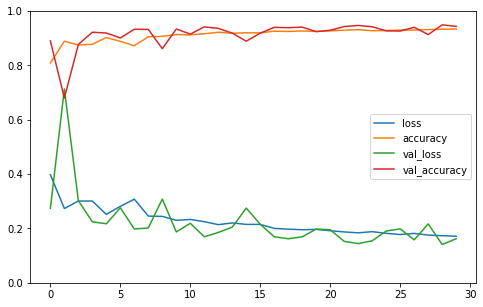

In [20]:
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize = (8,5))
plt.grid = True
plt.gca().set_ylim(0,1)
plt.show()


In [21]:
model.evaluate(X_test, y_test)

178/178 [==============================] - 0s 1ms/step - loss: 0.1652 - accuracy: 0.9418


[0.1652427464723587, 0.9417886734008789]

In [25]:
model.save('./models/self-tuned-model')

INFO:tensorflow:Assets written to: ./models/self-tuned-model/assets


INFO:tensorflow:Assets written to: ./models/self-tuned-model/assets


# Keras Tuner

In [20]:
import kerastuner as kt
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout
import time

In [21]:
kt.__version__

'1.0.1'

In [22]:
LOG_DIR = f"./keras_tuner_logs/{int(time.time())}"

In [23]:
def build_model(hp):
    model = keras.Sequential()

    # Tune the number of units in the first Dense layer
    # Choose an optimal value between 256-512 step 32
    hp_input_units = hp.Int('input_units', min_value = 256, max_value = 512, step = 32)
    model.add(Dense(units = hp_input_units, input_shape = (769,), activation = 'relu'))
    
    for i in range(hp.Int("n_layers", min_value = 1, max_value = 6)):
        # Tune the number of units in the each Dense layer
        # Choose an optimal value between 8-512 step 8
        hp_dense_i_units = hp.Int(f"dense_{i}_units", min_value = 8, max_value = 512, step = 8)
        model.add(Dense(units = hp_dense_i_units, activation = 'relu'))
        
        # Tune the number of dropout rate between Dense layers
        # Choose an optimal value between 0-0.5 step 0.1
        hp_dense_i_dropout_rate = hp.Float(f"dense_{i}_dropout_rate", min_value = 0, max_value = 0.5, step = 0.1)
        model.add(Dropout(hp_dense_i_dropout_rate))
    
    model.add(Dense(units = 1, activation = 'sigmoid'))# here the units must be 1 in order for binary classifications to work
    
    # Tune the number of dropout rate between Dense layers
    # Choose an optimal value between 0.0008-0.001 step 0.00002
    # 10 numbers
    hp_lr_rate = hp.Float(f"optimizer_lr_rate", min_value = 0.0008, max_value = 0.001, step = 0.00002)
    model.compile(loss = 'binary_crossentropy',
             optimizer = keras.optimizers.Adam(lr=hp_lr_rate, beta_1 = 0.9, beta_2=0.999), # you can tune the learning rate here. Default lr = 0.01
             metrics=['accuracy'])
    
    return model

In [24]:
tuner = kt.RandomSearch(
    build_model,
    objective = "val_accuracy",
    max_trials = 5,
    executions_per_trial = 3,
    directory = LOG_DIR
)

In [25]:
tuner.search(x = X_train,
             y = y_train,
             epochs = 30,
#              batch_size = 64,
             validation_data = (X_valid, y_valid))

Epoch 1/30
829/829 [==============================] - ETA: 0s - loss: 0.6914 - accuracy: 0.59 - ETA: 1s - loss: 0.6919 - accuracy: 0.55 - ETA: 1s - loss: 0.6892 - accuracy: 0.55 - ETA: 1s - loss: 0.6868 - accuracy: 0.56 - ETA: 1s - loss: 0.6832 - accuracy: 0.57 - ETA: 1s - loss: 0.6803 - accuracy: 0.58 - ETA: 1s - loss: 0.6777 - accuracy: 0.58 - ETA: 1s - loss: 0.6778 - accuracy: 0.58 - ETA: 1s - loss: 0.6790 - accuracy: 0.58 - ETA: 1s - loss: 0.6783 - accuracy: 0.58 - ETA: 1s - loss: 0.6766 - accuracy: 0.58 - ETA: 1s - loss: 0.6759 - accuracy: 0.58 - ETA: 0s - loss: 0.6742 - accuracy: 0.58 - ETA: 0s - loss: 0.6735 - accuracy: 0.58 - ETA: 0s - loss: 0.6727 - accuracy: 0.58 - ETA: 0s - loss: 0.6704 - accuracy: 0.59 - ETA: 0s - loss: 0.6659 - accuracy: 0.59 - ETA: 0s - loss: 0.6600 - accuracy: 0.60 - ETA: 0s - loss: 0.6511 - accuracy: 0.61 - ETA: 0s - loss: 0.6455 - accuracy: 0.62 - ETA: 0s - loss: 0.6345 - accuracy: 0.63 - ETA: 0s - loss: 0.6233 - accuracy: 0.64 - ETA: 0s - loss: 0.6178

Epoch 1/30
829/829 [==============================] - ETA: 0s - loss: 0.7328 - accuracy: 0.43 - ETA: 2s - loss: 0.7106 - accuracy: 0.56 - ETA: 2s - loss: 0.7029 - accuracy: 0.54 - ETA: 2s - loss: 0.6994 - accuracy: 0.55 - ETA: 2s - loss: 0.6957 - accuracy: 0.56 - ETA: 2s - loss: 0.6933 - accuracy: 0.56 - ETA: 2s - loss: 0.6915 - accuracy: 0.56 - ETA: 2s - loss: 0.6886 - accuracy: 0.56 - ETA: 2s - loss: 0.6905 - accuracy: 0.56 - ETA: 2s - loss: 0.6887 - accuracy: 0.56 - ETA: 2s - loss: 0.6876 - accuracy: 0.57 - ETA: 2s - loss: 0.6861 - accuracy: 0.57 - ETA: 2s - loss: 0.6826 - accuracy: 0.57 - ETA: 2s - loss: 0.6793 - accuracy: 0.58 - ETA: 2s - loss: 0.6742 - accuracy: 0.59 - ETA: 2s - loss: 0.6705 - accuracy: 0.59 - ETA: 2s - loss: 0.6694 - accuracy: 0.59 - ETA: 2s - loss: 0.6647 - accuracy: 0.60 - ETA: 2s - loss: 0.6618 - accuracy: 0.60 - ETA: 2s - loss: 0.6596 - accuracy: 0.60 - ETA: 2s - loss: 0.6570 - accuracy: 0.61 - ETA: 2s - loss: 0.6554 - accuracy: 0.61 - ETA: 2s - loss: 0.6552

Epoch 1/30
829/829 [==============================] - ETA: 0s - loss: 0.6571 - accuracy: 0.62 - ETA: 4s - loss: 0.7171 - accuracy: 0.55 - ETA: 5s - loss: 0.7088 - accuracy: 0.55 - ETA: 6s - loss: 0.7064 - accuracy: 0.52 - ETA: 6s - loss: 0.7036 - accuracy: 0.53 - ETA: 7s - loss: 0.7023 - accuracy: 0.52 - ETA: 7s - loss: 0.6989 - accuracy: 0.54 - ETA: 7s - loss: 0.6975 - accuracy: 0.55 - ETA: 7s - loss: 0.6943 - accuracy: 0.56 - ETA: 6s - loss: 0.6951 - accuracy: 0.56 - ETA: 5s - loss: 0.6945 - accuracy: 0.56 - ETA: 5s - loss: 0.6934 - accuracy: 0.57 - ETA: 6s - loss: 0.6928 - accuracy: 0.57 - ETA: 6s - loss: 0.6924 - accuracy: 0.57 - ETA: 6s - loss: 0.6897 - accuracy: 0.57 - ETA: 6s - loss: 0.6897 - accuracy: 0.57 - ETA: 6s - loss: 0.6884 - accuracy: 0.57 - ETA: 5s - loss: 0.6863 - accuracy: 0.58 - ETA: 5s - loss: 0.6880 - accuracy: 0.58 - ETA: 5s - loss: 0.6877 - accuracy: 0.58 - ETA: 5s - loss: 0.6877 - accuracy: 0.58 - ETA: 5s - loss: 0.6877 - accuracy: 0.58 - ETA: 5s - loss: 0.6867

Epoch 1/30
829/829 [==============================] - ETA: 0s - loss: 0.7006 - accuracy: 0.43 - ETA: 3s - loss: 0.7000 - accuracy: 0.55 - ETA: 3s - loss: 0.6950 - accuracy: 0.57 - ETA: 3s - loss: 0.6924 - accuracy: 0.57 - ETA: 3s - loss: 0.6894 - accuracy: 0.58 - ETA: 3s - loss: 0.6856 - accuracy: 0.58 - ETA: 3s - loss: 0.6841 - accuracy: 0.58 - ETA: 3s - loss: 0.6802 - accuracy: 0.59 - ETA: 3s - loss: 0.6811 - accuracy: 0.58 - ETA: 3s - loss: 0.6799 - accuracy: 0.59 - ETA: 3s - loss: 0.6804 - accuracy: 0.59 - ETA: 3s - loss: 0.6810 - accuracy: 0.59 - ETA: 3s - loss: 0.6812 - accuracy: 0.58 - ETA: 3s - loss: 0.6811 - accuracy: 0.58 - ETA: 3s - loss: 0.6819 - accuracy: 0.58 - ETA: 3s - loss: 0.6820 - accuracy: 0.59 - ETA: 3s - loss: 0.6821 - accuracy: 0.59 - ETA: 3s - loss: 0.6824 - accuracy: 0.59 - ETA: 3s - loss: 0.6826 - accuracy: 0.58 - ETA: 3s - loss: 0.6824 - accuracy: 0.59 - ETA: 3s - loss: 0.6817 - accuracy: 0.59 - ETA: 2s - loss: 0.6813 - accuracy: 0.59 - ETA: 2s - loss: 0.6801

Epoch 1/30
829/829 [==============================] - ETA: 0s - loss: 0.6545 - accuracy: 0.62 - ETA: 9s - loss: 0.8085 - accuracy: 0.53 - ETA: 3s - loss: 0.7396 - accuracy: 0.53 - ETA: 3s - loss: 0.7282 - accuracy: 0.52 - ETA: 2s - loss: 0.7080 - accuracy: 0.55 - ETA: 2s - loss: 0.6985 - accuracy: 0.56 - ETA: 2s - loss: 0.6883 - accuracy: 0.57 - ETA: 2s - loss: 0.6823 - accuracy: 0.58 - ETA: 1s - loss: 0.6729 - accuracy: 0.59 - ETA: 1s - loss: 0.6659 - accuracy: 0.60 - ETA: 1s - loss: 0.6611 - accuracy: 0.61 - ETA: 1s - loss: 0.6535 - accuracy: 0.62 - ETA: 1s - loss: 0.6430 - accuracy: 0.63 - ETA: 1s - loss: 0.6291 - accuracy: 0.65 - ETA: 1s - loss: 0.6171 - accuracy: 0.66 - ETA: 1s - loss: 0.6080 - accuracy: 0.66 - ETA: 1s - loss: 0.5999 - accuracy: 0.67 - ETA: 1s - loss: 0.5862 - accuracy: 0.68 - ETA: 1s - loss: 0.5743 - accuracy: 0.69 - ETA: 1s - loss: 0.5622 - accuracy: 0.70 - ETA: 1s - loss: 0.5536 - accuracy: 0.71 - ETA: 1s - loss: 0.5483 - accuracy: 0.71 - ETA: 0s - loss: 0.5415

INFO:tensorflow:Oracle triggered exit


In [26]:
tuner.get_best_hyperparameters(num_trials=1)

In [27]:
# tuner.results_summery()

In [28]:
tuner.get_best_models()[0].summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 352)               271040    
_________________________________________________________________
dense_1 (Dense)              (None, 400)               141200    
_________________________________________________________________
dropout (Dropout)            (None, 400)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 401       
Total params: 412,641
Trainable params: 412,641
Non-trainable params: 0
_________________________________________________________________


In [29]:
model = tuner.get_best_models()[0]

In [30]:
import os
root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_log_dir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_log_dir()

tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train, y_train, epochs = 30, 
                   validation_data=(X_valid, y_valid),
                   callbacks=[tensorboard_cb])

%tensorboard --logdir my_logs

Epoch 1/30
829/829 [==============================] - ETA: 37s - loss: 0.1904 - accuracy: 0.9396 - ETA: 16s - loss: 0.1997 - accuracy: 0.933 - ETA: 10s - loss: 0.1931 - accuracy: 0.936 - ETA: 8s - loss: 0.1758 - accuracy: 0.940 - ETA: 7s - loss: 0.1707 - accuracy: 0.94 - ETA: 6s - loss: 0.1681 - accuracy: 0.94 - ETA: 5s - loss: 0.1698 - accuracy: 0.94 - ETA: 4s - loss: 0.1666 - accuracy: 0.94 - ETA: 4s - loss: 0.1685 - accuracy: 0.94 - ETA: 3s - loss: 0.1686 - accuracy: 0.94 - ETA: 3s - loss: 0.1689 - accuracy: 0.94 - ETA: 3s - loss: 0.1690 - accuracy: 0.94 - ETA: 3s - loss: 0.1709 - accuracy: 0.94 - ETA: 2s - loss: 0.1690 - accuracy: 0.94 - ETA: 2s - loss: 0.1662 - accuracy: 0.94 - ETA: 2s - loss: 0.1697 - accuracy: 0.94 - ETA: 2s - loss: 0.1723 - accuracy: 0.94 - ETA: 2s - loss: 0.1722 - accuracy: 0.94 - ETA: 2s - loss: 0.1745 - accuracy: 0.93 - ETA: 1s - loss: 0.1741 - accuracy: 0.94 - ETA: 1s - loss: 0.1755 - accuracy: 0.93 - ETA: 1s - loss: 0.1744 - accuracy: 0.94 - ETA: 1s - loss

Reusing TensorBoard on port 6006 (pid 39995), started 2 days, 8:35:39 ago. (Use '!kill 39995' to kill it.)

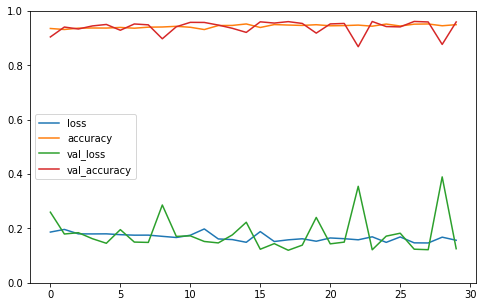

In [31]:
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize = (8,5))
plt.grid = True
plt.gca().set_ylim(0,1)
plt.show()

In [32]:
model.evaluate(X_test, y_test)

178/178 [==============================] - ETA: 0s - loss: 0.1393 - accuracy: 0.93 - ETA: 0s - loss: 0.1259 - accuracy: 0.95 - ETA: 0s - loss: 0.1314 - accuracy: 0.95 - ETA: 0s - loss: 0.1386 - accuracy: 0.95 - ETA: 0s - loss: 0.1351 - accuracy: 0.95 - 0s 1ms/step - loss: 0.1362 - accuracy: 0.9555


[0.13617338240146637, 0.9555476903915405]

In [33]:
model.save('./models/keras-tuner-tuned-model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: ./models/keras-tuner-tuned-model/assets


# Real-world Test (r/shortscarystories and r/self)

In [1]:
import numpy as np
from tensorflow import keras
model = keras.models.load_model('./models/self-tuned-model')

In [3]:
from sentence_transformers import SentenceTransformer
sbert_model = SentenceTransformer('distilbert-base-nli-stsb-mean-tokens')

text_creepy = """
This is so creepy. I feel so bad. Ghosts are in my house.
"""

text_non_creepy = """
Apples can grow from 10 to 30 feet tall and nearly as wide. They are moderately fast-growing, but growth slows with age. 
"""

import spacy

# spacy.prefer_gpu()
# Must return True for GPU to work

nlp = spacy.load('en_core_web_lg')

# need nlp and model
def sum_vec(text):
    doc = nlp(text)
    sentences = [sent.text for sent in doc.sents]
    comment_vec = model.encode(sentences)
    return np.sum(comment_vec, axis = 0)

RuntimeError: CUDA error: out of memory

In [5]:
creepy_vec = np.concatenate(([np.log(1310+1+0.01)],sbert_model.encode(text_creepy)))
non_creepy_vec = np.concatenate(([np.log(1136+1+0.01)],sbert_model.encode(text_non_creepy)))
vecs = np.array([creepy_vec, non_creepy_vec])
vecs

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_vecs = scaler.fit_transform(vecs)

model.predict(scaled_vecs)

RuntimeError: CUDA error: out of memory

In [63]:
model

Failed

In [2]:
import spacy

In [4]:
nlp = spacy.load("en_core_web_sm")
doc = nlp(text_non_creepy)
for idx, sents in enumerate(doc.sents):
    pass
print(idx)

3


In [63]:
from tensorflow import keras
model = keras.models.load_model('./models/keras-tuner-tuned-model/')

In [64]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 352)               271040    
_________________________________________________________________
dense_1 (Dense)              (None, 400)               141200    
_________________________________________________________________
dropout (Dropout)            (None, 400)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 401       
Total params: 412,641
Trainable params: 412,641
Non-trainable params: 0
_________________________________________________________________


In [65]:
import os
root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_log_dir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_log_dir()

tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train, y_train, epochs = 30, 
                   validation_data=(X_valid, y_valid),
                   callbacks=[tensorboard_cb])

%tensorboard --logdir my_logs

Epoch 1/30
  1/829 [..............................] - ETA: 0s - loss: 0.2395 - accuracy: 0.9375WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0049s vs `on_train_batch_end` time: 0.0382s). Check your callbacks.


829/829 [==============================] - ETA: 14s - loss: 0.2834 - accuracy: 0.906 - ETA: 4s - loss: 0.1354 - accuracy: 0.954 - ETA: 3s - loss: 0.1215 - accuracy: 0.95 - ETA: 3s - loss: 0.1377 - accuracy: 0.95 - ETA: 2s - loss: 0.1403 - accuracy: 0.95 - ETA: 2s - loss: 0.1451 - accuracy: 0.95 - ETA: 2s - loss: 0.1535 - accuracy: 0.94 - ETA: 2s - loss: 0.1599 - accuracy: 0.94 - ETA: 2s - loss: 0.1584 - accuracy: 0.94 - ETA: 2s - loss: 0.1550 - accuracy: 0.94 - ETA: 2s - loss: 0.1538 - accuracy: 0.94 - ETA: 2s - loss: 0.1481 - accuracy: 0.95 - ETA: 2s - loss: 0.1485 - accuracy: 0.95 - ETA: 2s - loss: 0.1513 - accuracy: 0.95 - ETA: 1s - loss: 0.1560 - accuracy: 0.94 - ETA: 1s - loss: 0.1548 - accuracy: 0.94 - ETA: 1s - loss: 0.1526 - accuracy: 0.94 - ETA: 1s - loss: 0.1553 - accuracy: 0.94 - ETA: 1s - loss: 0.1534 - accuracy: 0.94 - ETA: 1s - loss: 0.1517 - accuracy: 0.94 - ETA: 1s - loss: 0.1508 - accuracy: 0.94 - ETA: 1s - loss: 0.1504 - accuracy: 0.95 - ETA: 1s - loss: 0.1500 - accur

Reusing TensorBoard on port 6006 (pid 39995), started 2 days, 9:03:45 ago. (Use '!kill 39995' to kill it.)